In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
net = cv2.dnn.readNetFromDarknet("./yolov3_custom.cfg.txt",
                                "./yolov3-obj_30000.weights")
classes = ['fish']

In [ ]:
x_cen=0
my_listcX = []
my_listcY=[]


#location of mp4 file
cap = cv2.VideoCapture('./fish.mp4')

centroid_dict = defaultdict(list)
object_id_list = []

imgCanvas = np.zeros((480,960,3),np.uint8)

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(960,480))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net.setInput(blob)

    output_layers_name = net.getUnconnectedOutLayersNames()

    layerOutputs = net.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []
    object_box = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []
    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            startX=x
            startY=y
            endX=x+w
            endY=y+h
            cX=int((2*x+w)/2.0)
            cY=int((2*y+h)/2.0)
        
            
            cv2.circle(img, (cX,cY), 4, (0, 255, 0), -1)
            start_pt = (cX, cY)
            end_pt = (cX, cY)
            cv2.line(img, start_pt, end_pt, (0, 255, 0), 2)
            cv2.line(img, start_pt, end_pt, (0, 255, 0), 2)
            cv2.line(imgCanvas, start_pt, end_pt, (0, 255, 0), 2)
            #list created to make a dataframe
            my_listcX.append(cX)
            my_listcY.append(cY)
            
            cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)
        
        
    img = cv2.addWeighted(img,0.5,imgCanvas,0.5,0)
    cv2.imshow('img',img)
    #cv2.imshow('canvas',imgCanvas)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()


In [4]:
my_listcX

[623,
 624,
 624,
 624,
 624,
 616,
 617,
 617,
 611,
 611,
 600,
 600,
 600,
 598,
 598,
 596,
 595,
 595,
 582,
 596,
 582,
 581,
 581,
 580,
 580,
 578,
 578,
 578,
 578,
 578,
 574,
 574,
 575,
 572,
 572,
 571,
 571,
 571,
 568,
 568,
 568,
 568,
 568,
 567,
 567,
 567,
 567,
 567,
 567,
 566,
 571,
 571,
 571,
 565,
 566,
 563,
 563,
 563,
 552,
 552,
 546,
 545,
 545,
 533,
 533,
 538,
 538,
 538,
 537,
 537,
 535,
 535,
 535,
 532,
 532,
 526,
 526,
 527,
 528,
 528,
 522,
 522,
 522,
 508,
 508,
 508,
 506,
 507,
 506,
 505,
 506,
 504,
 504,
 502,
 502,
 498,
 498,
 498,
 497,
 498,
 490,
 490,
 490,
 484,
 485,
 480,
 480,
 480,
 476,
 477,
 474,
 474,
 474,
 466,
 466,
 463,
 463,
 463,
 455,
 455,
 454,
 454,
 454,
 451,
 452,
 449,
 450,
 450,
 434,
 434,
 432,
 432,
 433,
 430,
 429,
 428,
 427,
 427,
 422,
 422,
 417,
 418,
 418,
 413,
 412,
 407,
 407,
 407,
 402,
 402,
 400,
 400,
 400,
 398,
 397,
 395,
 395,
 395,
 393,
 394,
 391,
 391,
 391,
 390,
 390,
 387,
 388

In [5]:
my_listcY

[342,
 343,
 343,
 343,
 343,
 341,
 342,
 342,
 340,
 340,
 325,
 325,
 325,
 325,
 326,
 323,
 322,
 322,
 322,
 322,
 320,
 321,
 321,
 321,
 320,
 319,
 319,
 319,
 317,
 317,
 314,
 313,
 315,
 312,
 312,
 310,
 311,
 310,
 310,
 310,
 308,
 308,
 308,
 307,
 308,
 307,
 308,
 307,
 306,
 306,
 306,
 307,
 307,
 304,
 304,
 304,
 304,
 304,
 303,
 303,
 300,
 301,
 300,
 287,
 287,
 302,
 302,
 302,
 301,
 302,
 302,
 302,
 302,
 302,
 301,
 290,
 290,
 290,
 302,
 301,
 289,
 288,
 289,
 285,
 285,
 285,
 285,
 285,
 283,
 283,
 282,
 282,
 282,
 282,
 282,
 274,
 275,
 275,
 269,
 269,
 268,
 268,
 268,
 270,
 270,
 270,
 270,
 270,
 268,
 269,
 267,
 267,
 267,
 269,
 268,
 268,
 268,
 268,
 268,
 270,
 268,
 266,
 266,
 271,
 270,
 269,
 269,
 269,
 266,
 265,
 265,
 265,
 265,
 263,
 263,
 262,
 262,
 263,
 252,
 252,
 251,
 250,
 250,
 250,
 250,
 249,
 249,
 249,
 250,
 250,
 250,
 251,
 251,
 250,
 251,
 250,
 250,
 250,
 251,
 251,
 250,
 250,
 250,
 252,
 252,
 252,
 252

In [47]:
d = {'cX' : my_listcX, 'cY' : my_listcY}
df = pd.DataFrame(d)
df.shape

(307, 2)

<AxesSubplot:>

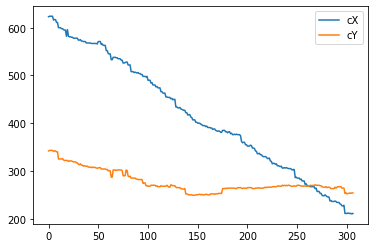

In [48]:
df.plot()

<h1>Prediction Using VAR Model</h1>

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [50]:
def adfuller_test(point):
    result=adfuller(point)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [51]:
adfuller_test(df['cX'].dropna())

ADF Test Statistic : 0.04401752206034298
p-value : 0.9620244144033178
#Lags Used : 15
Number of Observations Used : 291
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [52]:
adfuller_test(df['cY'].dropna())

ADF Test Statistic : -3.2383944889314833
p-value : 0.01786708068159714
#Lags Used : 2
Number of Observations Used : 304
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


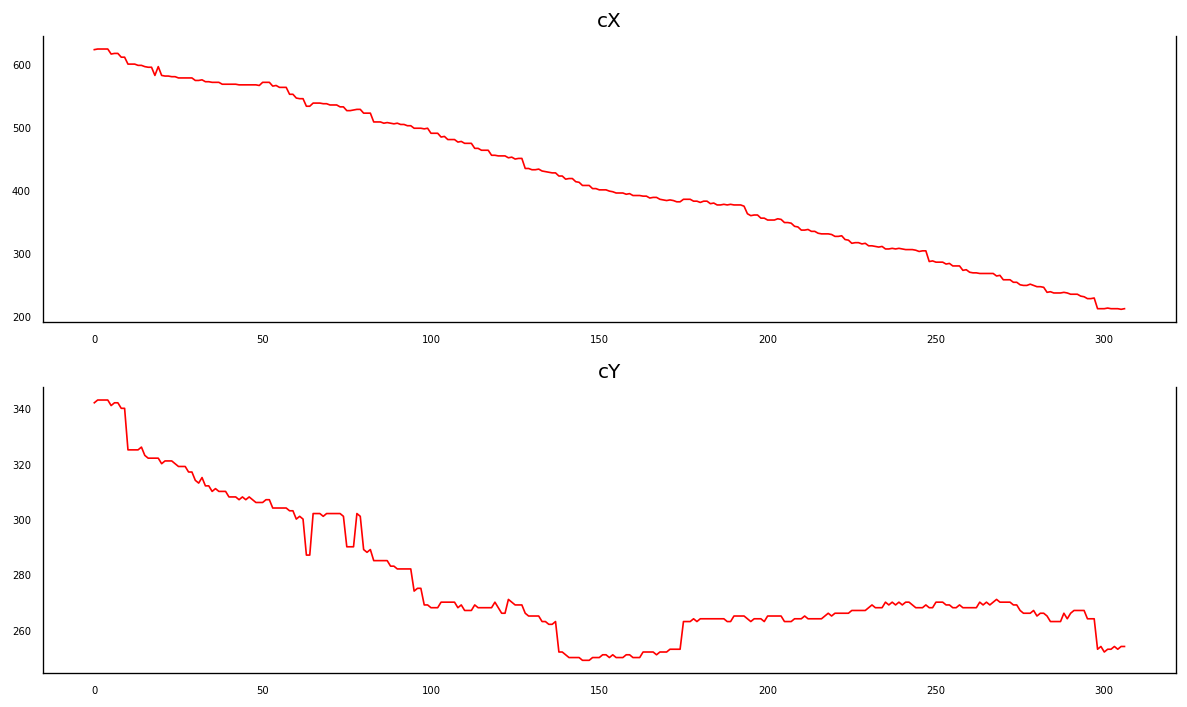

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [54]:
print('cX causes cY?\n')
print('------------------')
granger_1 = grangercausalitytests(df[['cX', 'cY']], 4)

print('\cY Yauses cX?\n')
print('------------------')
granger_2 = grangercausalitytests(df[['cY', 'cX']], 4)


cX causes cY?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0970  , p=0.7556  , df_denom=303, df_num=1
ssr based chi2 test:   chi2=0.0980  , p=0.7543  , df=1
likelihood ratio test: chi2=0.0980  , p=0.7543  , df=1
parameter F test:         F=0.0970  , p=0.7556  , df_denom=303, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6072  , p=0.2022  , df_denom=300, df_num=2
ssr based chi2 test:   chi2=3.2680  , p=0.1952  , df=2
likelihood ratio test: chi2=3.2506  , p=0.1969  , df=2
parameter F test:         F=1.6072  , p=0.2022  , df_denom=300, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5594  , p=0.1993  , df_denom=297, df_num=3
ssr based chi2 test:   chi2=4.7883  , p=0.1880  , df=3
likelihood ratio test: chi2=4.7510  , p=0.1910  , df=3
parameter F test:         F=1.5594  , p=0.1993  , df_denom=297, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F te

In [55]:
df = df[['cX','cY']]
print(df.shape)

(307, 2)


In [93]:
train_df=df[:-12]
test_df=df[-12:]

In [94]:
print(test_df.shape)

(12, 2)


In [95]:
model = VAR(train_df.diff()[1:])

In [96]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        3.545      3.571*       34.64       3.556
1        3.514       3.593       33.58       3.546
2        3.474       3.606       32.27      3.527*
3        3.481       3.665       32.48       3.555
4        3.480       3.718       32.47       3.576
5       3.454*       3.744      31.63*       3.570
6        3.476       3.819       32.34       3.614
7        3.492       3.887       32.84       3.650
8        3.506       3.955       33.33       3.686
9        3.503       4.004       33.22       3.704
10       3.479       4.032       32.43       3.701
11       3.506       4.113       33.35       3.750
12       3.523       4.183       33.93       3.788
13       3.521       4.233       33.85       3.806
14       3.533       4.297       34.27       3.840
15       3.542       4.360       34.60       3.870
16       3.571       4.441     

In [99]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
#train_df= train_df.astype('int64')
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:           ['cX', 'cY']   No. Observations:                  295
Model:                         VAR(4)   Log Likelihood              -11660.881
                          + intercept   AIC                          23363.763
Date:                Thu, 25 Nov 2021   BIC                          23441.189
Time:                        17:17:29   HQIC                         23394.766
Sample:                             0                                         
                                - 295                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):         259.74, 268.31   Jarque-Bera (JB):           7.03, 4.71
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.03, 0.09
Heteroskedasticity (H):         0.36, 0.64   Skew:                      -0.02, 0.00
Prob(H) (two-sided):            0.00,

In [100]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [101]:
predictions.columns=['cX_predicted','cY_predicted']
predictions


,cX_predicted,cY_predicted
295,204.346593,244.855216
296,182.485958,238.261442
297,190.162895,237.396200
298,191.690849,238.278900
299,183.398944,238.815489
300,205.134314,244.312486
301,191.289835,242.646514
302,197.344653,243.268048
303,199.839831,244.007238
304,191.667148,241.855094


In [102]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<AxesSubplot:>

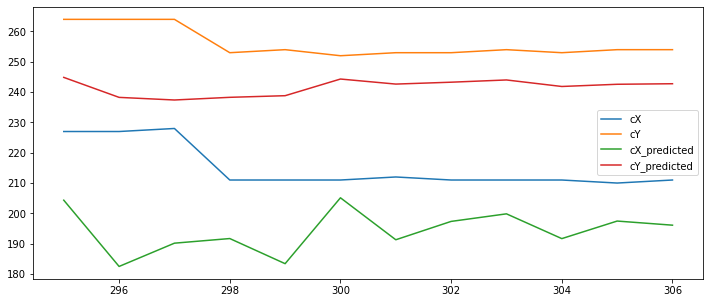

In [103]:
test_vs_pred.plot(figsize=(12,5))


In [104]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_cX=math.sqrt(mean_squared_error(predictions['cX_predicted'],test_df['cX']))
print('Mean value of cX is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['cX']),rmse_cX))

rmse_cY=math.sqrt(mean_squared_error(predictions['cY_predicted'],test_df['cY']))
print('Mean value of cY is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['cY']),rmse_cY))

Mean value of cX is : 215.08333333333334. Root Mean Squared Error is :23.43142792753098
Mean value of cY is : 256. Root Mean Squared Error is :15.614408413441664


<h1> Prediction Of Y-cordinate Using AR Model </h1>


In [105]:
df = pd.DataFrame(d)
df.shape


(307, 2)

In [106]:
df = pd.DataFrame(d)
df.shape


(307, 2)

In [107]:
df.head()

,cX,cY
0,623,342
1,624,343
2,624,343
3,624,343
4,624,343


In [109]:
X = df["cY"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -3.238394
p-value: 0.017867
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
Reject Ho - Time Series is Stationary


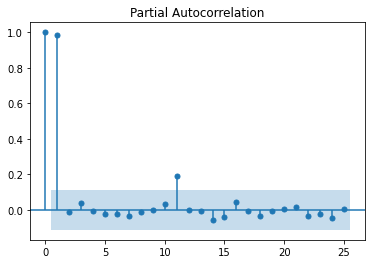

In [110]:
plot_pacf(X, lags=25);

In [111]:
df["Values_shifted"]  = df["cY"].shift()


In [112]:

df.dropna(inplace=True)

In [113]:
df.head()

,cX,cY,Values_shifted
1,624,343,342.0
2,624,343,343.0
3,624,343,343.0
4,624,343,343.0
5,616,341,343.0


In [114]:
y = df.cY.values
X = df.Values_shifted.values

In [115]:
train_size = int(len(X) * 0.80)

In [116]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [117]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import AutoReg

In [120]:
model= AutoReg(X_train,lags =25).fit()

In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  244
Model:                    AutoReg(25)   Log Likelihood                -489.359
Method:               Conditional MLE   S.D. of innovations              2.260
Date:                Thu, 25 Nov 2021   AIC                              1.878
Time:                        17:18:55   BIC                              2.296
Sample:                            25   HQIC                             2.046
                                  244                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7834      2.245      2.131      0.033       0.383       9.184
y.L1           0.9058      0.068     13.407      0.000       0.773       1.038
y.L2          -0.2024      0.091     -2.230      0.026      -0.380      -0.025
y.L3           0.2320      0.092      2.528      0.011       0.052       0.412
y.L4           0.0119      0.093      0.127      0.899      -0.171       0.195
y.L5           0.1004      0.093      1.080      0.280      -0.082       0.283
y.L6          -0.0678      0.093     -0.730      0.465      -0.250       0.114
y.L7           0.0539      0.093      0.579      0.562      -0.129       0.237
y.L8          -0.0420      0.093     -0.450      0.653      -0.225       0.141
y.L9          -0.0201      0.094     -0.215      0.830      -0.204       0.163
y.L10         -0.0158      0.094     -0.169      0.866      -0.200       0.168
y.L11          0.0344      0.094      0.368      0.713      -0.149       0.218
y.L12          0.0890      0.094      0.952      0.341      -0.094       0.272
y.L13          0.0362      0.094      0.386      0.699      -0.147       0.220
y.L14         -0.0727      0.093     -0.780      0.435      -0.256       0.110
y.L15         -0.1208      0.090     -1.347      0.178      -0.297       0.055
y.L16          0.0230      0.086      0.268      0.789      -0.146       0.192
y.L17          0.0332      0.086      0.387      0.699      -0.135       0.202
y.L18         -0.0103      0.085     -0.120      0.904      -0.178       0.157
y.L19         -0.0221      0.085     -0.259      0.796      -0.189       0.145
y.L20          0.1306      0.085      1.536      0.125      -0.036       0.297
y.L21         -0.0797      0.085     -0.938      0.348      -0.246       0.087
y.L22          0.0155      0.085      0.182      0.856      -0.151       0.182
y.L23          0.0452      0.084      0.537      0.591      -0.120       0.210
y.L24         -0.0979      0.084     -1.170      0.242      -0.262       0.066
y.L25          0.0223      0.061      0.363      0.717      -0.098       0.143
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1768           -0.1143j            1.1823           -0.4846
AR.2            -1.1768           +0.1143j            1.1823            0.4846
AR.3            -1.0254           -0.4120j            1.1051           -0.4392
AR.4            -1.0254           +0.4120j            1.1051            0.4392
AR.5            -0.8569           -0.6637j            1.0839           -0.3951
AR.6            -0.8569           +0.6637j            1.0839            0.3951
AR.7            -0.6322           -0.8712j            1.0764           -0.3499
AR.8            -0.6322           +0.8712j            1.0764            0.3499
AR

In [171]:
pred = model.predict(start = len(X_train),end = len(X_train),dynamic =False)

In [172]:
from matplotlib import pyplot
#pyplot.plot(X_test,color='red')

In [174]:
dfx=pd.DataFrame(X)
dfx_pred=pd.DataFrame(X_train)
test_pred=pd.concat([dfx,dfx_pred],axis=1)

Text(0, 0.5, 'Y-cordinated of Centroid')

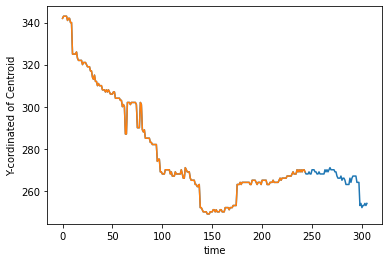

In [177]:
pyplot.plot(test_pred)
plt.xlabel("time")
plt.ylabel("Y-cordinated of Centroid")

<h1> Prediction Of X-cordinate Using AR Model </h1>


In [178]:
df = pd.DataFrame(d)
df.shape


(307, 2)

In [179]:
df.head()

,cX,cY
0,623,342
1,624,343
2,624,343
3,624,343
4,624,343


In [181]:
X = df["cX"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 0.044018
p-value: 0.962024
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572
Failed to Reject Ho - Time Series is Non-Stationary


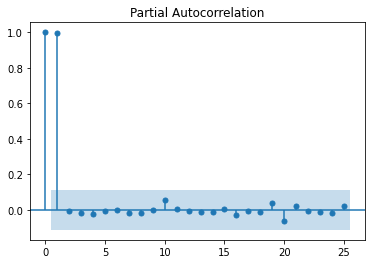

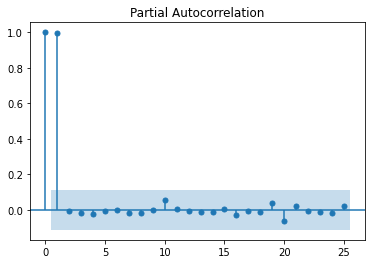

In [182]:
plot_pacf(X, lags=25)


In [183]:
df["cX_shifted"]  = df["cX"].shift()


In [184]:
df.head()

,cX,cY,cX_shifted
0,623,342,NaN
1,624,343,623.0
2,624,343,624.0
3,624,343,624.0
4,624,343,624.0


In [185]:
df.dropna (inplace=True)

In [186]:
y = df.cX.values
X = df.cX_shifted.values


In [187]:
train_size = int(len(X) * 0.80)

In [188]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [189]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [190]:
pred = model.predict(start = len(X_test)+20,end = len(X)-100,dynamic =False)

In [191]:
model= AutoReg(X_train,lags =25).fit()

In [192]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  244
Model:                    AutoReg(25)   Log Likelihood                -495.210
Method:               Conditional MLE   S.D. of innovations              2.322
Date:                Thu, 25 Nov 2021   AIC                              1.931
Time:                        17:44:45   BIC                              2.349
Sample:                            25   HQIC                             2.100
                                  244                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2693      0.955     -1.329      0.184      -3.141       0.602
y.L1           0.9186      0.067     13.653      0.000       0.787       1.051
y.L2           0.0160      0.091      0.176      0.860      -0.162       0.194
y.L3           0.1848      0.091      2.041      0.041       0.007       0.362
y.L4          -0.1664      0.091     -1.825      0.068      -0.345       0.012
y.L5           0.1904      0.090      2.124      0.034       0.015       0.366
y.L6          -0.2121      0.082     -2.579      0.010      -0.373      -0.051
y.L7          -0.0597      0.077     -0.779      0.436      -0.210       0.091
y.L8           0.0599      0.075      0.794      0.427      -0.088       0.208
y.L9           0.0509      0.076      0.674      0.501      -0.097       0.199
y.L10          0.1220      0.075      1.626      0.104      -0.025       0.269
y.L11         -0.0910      0.075     -1.221      0.222      -0.237       0.055
y.L12          0.0094      0.075      0.126      0.900      -0.137       0.156
y.L13         -0.0719      0.075     -0.963      0.336      -0.218       0.074
y.L14          0.0034      0.075      0.045      0.964      -0.143       0.150
y.L15          0.1250      0.074      1.686      0.092      -0.020       0.270
y.L16         -0.0616      0.074     -0.837      0.403      -0.206       0.083
y.L17          0.0290      0.073      0.394      0.693      -0.115       0.173
y.L18         -0.1454      0.073     -1.987      0.047      -0.289      -0.002
y.L19         -0.0015      0.074     -0.020      0.984      -0.146       0.143
y.L20          0.2063      0.073      2.817      0.005       0.063       0.350
y.L21         -0.1226      0.075     -1.644      0.100      -0.269       0.024
y.L22          0.0768      0.075      1.022      0.307      -0.071       0.224
y.L23         -0.0606      0.075     -0.808      0.419      -0.208       0.086
y.L24         -0.0442      0.074     -0.597      0.550      -0.189       0.101
y.L25          0.0443      0.059      0.751      0.453      -0.071       0.160
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.8333           -0.6028j            1.0285           -0.4003
AR.2            -0.8333           +0.6028j            1.0285            0.4003
AR.3            -1.0628           -0.3395j            1.1157           -0.4508
AR.4            -1.0628           +0.3395j            1.1157            0.4508
AR.5            -1.1396           -0.0000j            1.1396           -0.5000
AR.6            -0.6409           -0.8428j            1.0589           -0.3535
AR.7            -0.6409           +0.8428j            1.0589            0.3535
AR.8            -1.6112           -0.0000j            1.6112           -0.5000
AR

In [197]:
pred = model.predict(start = len(X_train),end = len(X_train),dynamic =False)
pred

array([304.60778108])

In [199]:
dfx=pd.DataFrame(X)
dfx_pred=pd.DataFrame(X_train)
test_pred=pd.concat([dfx,dfx_pred],axis=1)

Text(0, 0.5, 'X-cordinated of Centroid')

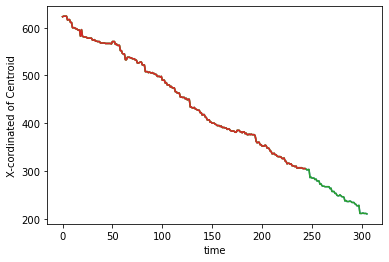

In [201]:
from matplotlib import pyplot
pyplot.plot(test_pred)
pyplot.plot(test_pred)
plt.xlabel("time")
plt.ylabel("X-cordinated of Centroid")
